In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from  sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.statespace.tools import diff
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.shape

(42, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

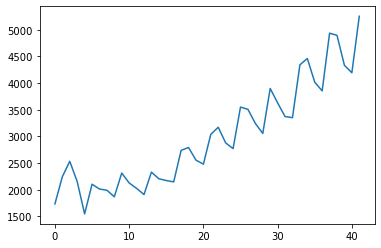

In [8]:
data['Sales'].plot()

In [9]:
data.index.freq = 'QS'
data.index

RangeIndex(start=0, stop=42, step=1)

In [10]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(data.shape[0]):
    p = data['Quarter'][i]
    data['Quarters'][i] = p[0:2]
    data['Year'][i] = p[3:5]

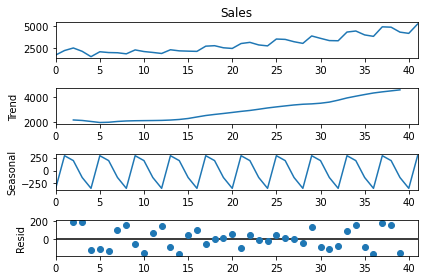

In [11]:
Seasonal_decompose =seasonal_decompose(data['Sales'],period=4)
Seasonal_decompose.plot()
plt.show()

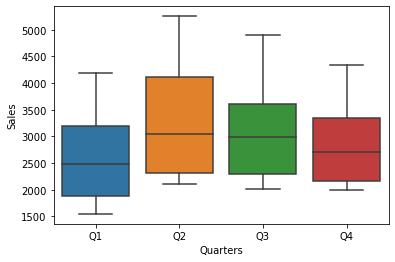

In [12]:
sns.boxplot(x='Quarters',y='Sales',data=data)
plt.show()

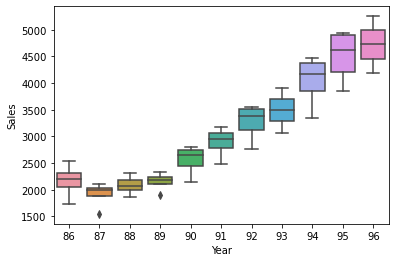

In [13]:
sns.boxplot(x='Year',y ='Sales',data=data)
plt.show()

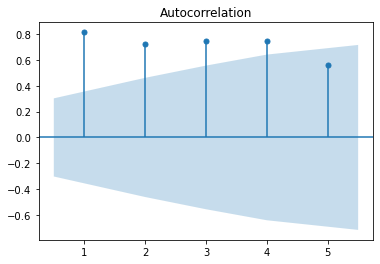

In [87]:
sgt.plot_acf(data['Sales'],lags=5,zero=False)
plt.show()

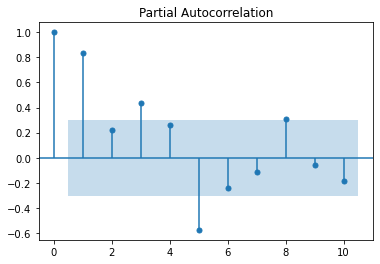

In [88]:
sgt.plot_pacf(data.Sales,lags=10)
plt.show()

In [16]:
data['t'] =pd.RangeIndex(start=0,stop=42,step=1)
data['sq_t'] = np.square(data['t'])
data['log_sale']= np.log(data['Sales'])
data = pd.get_dummies(data=data,columns=['Quarters'])
data

,Quarter,Sales,Year,t,sq_t,log_sale,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,0,0,7.458663,1,0,0,0
1,Q2_86,2244.960999,86,1,1,7.716443,0,1,0,0
2,Q3_86,2533.804993,86,2,4,7.837477,0,0,1,0
3,Q4_86,2154.962997,86,3,9,7.675529,0,0,0,1
4,Q1_87,1547.818996,87,4,16,7.344602,1,0,0,0
5,Q2_87,2104.411995,87,5,25,7.651791,0,1,0,0
6,Q3_87,2014.362999,87,6,36,7.608058,0,0,1,0
7,Q4_87,1991.746998,87,7,49,7.596767,0,0,0,1
8,Q1_88,1869.049999,88,8,64,7.533186,1,0,0,0
9,Q2_88,2313.631996,88,9,81,7.746574,0,1,0,0


In [17]:
train_data = data.head(30)
test_data  = data.tail(12)

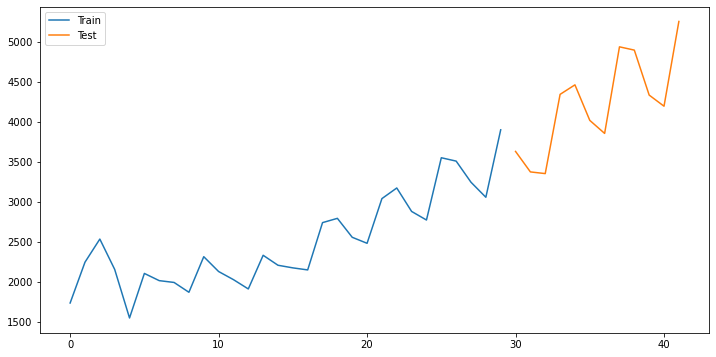

In [18]:
train_data['Sales'].plot(legend=True,label='Train')
test_data['Sales'].plot(legend=True,label='Test',figsize=(12,6));

In [19]:
TES_mul_mul = ExponentialSmoothing(train_data['Sales'],trend='mul',seasonal='mul',seasonal_periods=4)
TES_fitted = TES_mul_mul.fit()

In [20]:
data_pred = TES_fitted.predict(start=30,end=41)

In [21]:
data_pred

30    3904.817479
31    3606.571933
32    3437.784439
33    4368.654650
34    4355.667179
35    4022.986242
36    3834.710566
37    4873.058927
38    4858.571924
39    4487.479691
40    4277.465731
41    5435.701654
dtype: float64

In [22]:
mean_squared_error(test_data['Sales'],data_pred)

18308.539292395628

In [23]:
TES_mul_add = ExponentialSmoothing(train_data['Sales'],trend='mul',seasonal='add',seasonal_periods=4)
TES_1 = TES_mul_add.fit()

In [24]:
data_pred1 = TES_1.predict(start=30,end=41)

In [25]:
mean_squared_error(test_data['Sales'],data_pred1)

154700.33331067648

In [26]:
TES_add_mul = ExponentialSmoothing(train_data['Sales'],trend='add',seasonal='mul',seasonal_periods=4)
TES_2 = TES_add_mul.fit()

In [27]:
data_pred2 =TES_2.predict(start=30,end=41)

In [28]:
mean_squared_error(test_data['Sales'],data_pred2)

33017.05969111293

In [29]:
TES_add_add = ExponentialSmoothing(train_data['Sales'],trend='add',seasonal='add',seasonal_periods=4)
TES_3 = TES_add_add.fit()

In [30]:
data_pred3 = TES_3.predict(start=30,end=41)

In [31]:
mean_squared_error(test_data['Sales'],data_pred3)

60260.47718653973

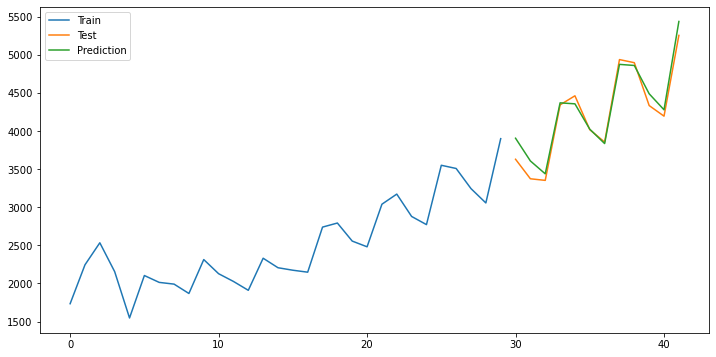

In [32]:
train_data['Sales'].plot(legend=True,label='Train')
test_data['Sales'].plot(legend=True,label='Test')
data_pred.plot(legend=True,label='Prediction',figsize=(12,6));

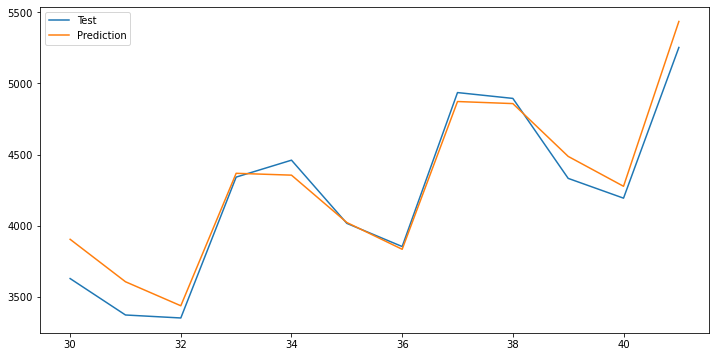

In [33]:
test_data['Sales'].plot(legend=True,label='Test')
data_pred.plot(legend=True,label='Prediction',figsize=(12,6));

In [34]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

In [35]:
model_ar1 = ARMA(data.Sales,order=(1,0))

In [36]:
result_ar1 = model_ar1.fit()

In [37]:
result_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                -315.765
Method:                       css-mle   S.D. of innovations            434.561
Date:                Fri, 19 Aug 2022   AIC                            637.530
Time:                        14:17:53   BIC                            642.743
Sample:                             0   HQIC                           639.441
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3200.1146    817.353      3.915      0.000    1598.132    4802.097
ar.L1.Sales     0.9365      0.058     16.173      0.000       0.823       1.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0679           +0.0000j            1.0679            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
model_ar2 = ARMA(data.Sales,order=(2,0))

In [39]:
result_ar2 = model_ar2.fit()

In [40]:
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(2, 0)   Log Likelihood                -315.611
Method:                       css-mle   S.D. of innovations            432.794
Date:                Fri, 19 Aug 2022   AIC                            639.222
Time:                        14:19:42   BIC                            646.173
Sample:                             0   HQIC                           641.770
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3215.6661    871.002      3.692      0.000    1508.534    4922.799
ar.L1.Sales     0.8489      0.167      5.068      0.000       0.521       1.177
ar.L2.Sales     0.0946      0.170      0.557      0.578      -0.238       0.427
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0543           +0.0000j            1.0543            0.0000
AR.2          -10.0319           +0.0000j           10.0319            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
LLR_test(model_ar1,model_ar2)

0.579

In [44]:
model_ma1 = ARMA(data.Sales,order=(0,1))

In [46]:
result_ma1 = model_ma1.fit()

In [47]:
reseult_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 1)   Log Likelihood                -333.381
Method:                       css-mle   S.D. of innovations            672.608
Date:                Fri, 19 Aug 2022   AIC                            672.763
Time:                        14:24:14   BIC                            677.976
Sample:                             0   HQIC                           674.674
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3008.1804    173.248     17.363      0.000    2668.621    3347.740
ma.L1.Sales     0.6853      0.075      9.116      0.000       0.538       0.833
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4592           +0.0000j            1.4592            0.5000
-----------------------------------------------------------------------------
"""

In [48]:
model_ma2 = ARMA(data.Sales,order=(0,2))

In [49]:
result_ma2 = model_ma2.fit()

In [51]:
result_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 2)   Log Likelihood                -315.004
Method:                       css-mle   S.D. of innovations            403.028
Date:                Fri, 19 Aug 2022   AIC                            638.009
Time:                        14:26:57   BIC                            644.960
Sample:                             0   HQIC                           640.557
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3038.9141    209.213     14.525      0.000    2628.865    3448.963
ma.L1.Sales     1.4327      0.152      9.406      0.000       1.134       1.731
ma.L2.Sales     1.0000      0.112      8.935      0.000       0.781       1.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.7164           -0.6977j            1.0000           -0.3771
MA.2           -0.7164           +0.6977j            1.0000            0.3771
-----------------------------------------------------------------------------
"""

In [52]:
LLR_test(model_ma1,model_ma2)

0.0

In [53]:
model_ma3 = ARMA(data.Sales,order=(0,3))

In [54]:
result_ma3 = model_ma3.fit()

In [55]:
result_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(0, 3)   Log Likelihood                -313.155
Method:                       css-mle   S.D. of innovations            382.700
Date:                Fri, 19 Aug 2022   AIC                            636.311
Time:                        14:29:08   BIC                            644.999
Sample:                             0   HQIC                           639.496
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3046.8764    248.295     12.271      0.000    2560.228    3533.525
ma.L1.Sales     1.6093      0.138     11.666      0.000       1.339       1.880
ma.L2.Sales     1.4046      0.209      6.726      0.000       0.995       1.814
ma.L3.Sales     0.3118      0.142      2.197      0.028       0.034       0.590
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.6487           -0.7610j            1.0000           -0.3624
MA.2           -0.6487           +0.7610j            1.0000            0.3624
MA.3           -3.2072           -0.0000j            3.2072           -0.5000
-----------------------------------------------------------------------------
"""

In [56]:
LLR_test(model_ma2,model_ma3)

0.054

In [58]:
d1 = diff(data['Sales'],k_diff=1)
sts.adfuller(d1)

(-2.5015370020337997,
 0.11510080332405515,
 3,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 382.7850907828347)

In [60]:
d2 = diff(data['Sales'],k_diff=2)
sts.adfuller(d2)

(-27.63262494638169,
 0.0,
 2,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 374.74616312273315)

<AxesSubplot:>

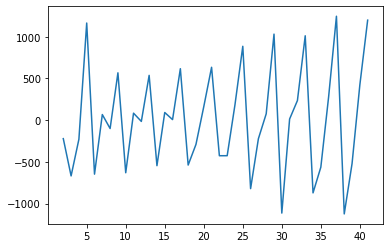

In [61]:
d2.plot()

In [91]:
model = ARIMA(train_data['Sales'],order=(2,2,4))
results =model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   28
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -189.338
Method:                       css-mle   S.D. of innovations            162.687
Date:                Fri, 19 Aug 2022   AIC                            394.676
Time:                        14:54:45   BIC                            405.334
Sample:                             2   HQIC                           397.934
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6521      4.687      0.779      0.436      -5.534      12.839
ar.L1.D2.Sales    -0.0080      0.050     -0.161      0.872      -0.106       0.089
ar.L2.D2.Sales    -0.9958      0.009   -111.360      0.000      -1.013      -0.978
ma.L1.D2.Sales    -1.7226        nan        nan        nan         nan         nan
ma.L2.D2.Sales     1.7342      0.163     10.655      0.000       1.415       2.053
ma.L3.D2.Sales    -1.7188      0.346     -4.973      0.000      -2.396      -1.041
ma.L4.D2.Sales     0.9980        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0040           -1.0021j            1.0021           -0.2506
AR.2           -0.0040           +1.0021j            1.0021            0.2506
MA.1           -0.0709           -0.9985j            1.0010           -0.2613
MA.2           -0.0709           +0.9985j            1.0010            0.2613
MA.3            0.9320           -0.3624j            1.0000           -0.0590
MA.4            0.9320           +0.3624j            1.0000            0.0590
-----------------------------------------------------------------------------
"""

In [92]:
pred_data = results.predict(30,41,dynamic=False,typ='levels')

In [93]:
pred_data

30    3910.944983
31    3565.601262
32    3513.974966
33    3973.681370
34    4144.125826
35    3815.033056
36    3785.307124
37    4257.927833
38    4435.733094
39    4122.993829
40    4115.079339
41    4600.512944
dtype: float64

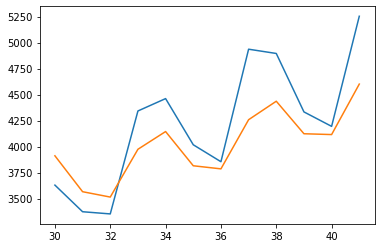

In [94]:
test_data['Sales'].plot()
pred_data.plot();

In [98]:
final_model = ARIMA(data['Sales'],order=(2,2,4))
model_fit = final_model.fit()

In [99]:
model_forcast = model_fit.predict(len(data),len(data)+12,typ='levels')
model_forcast

42    5642.863025
43    5068.432397
44    5120.355187
45    6006.059081
46    6229.289893
47    5817.007926
48    6098.300133
49    6861.063937
50    6951.329709
51    6721.347876
52    7149.255977
53    7782.839091
54    7814.741956
dtype: float64

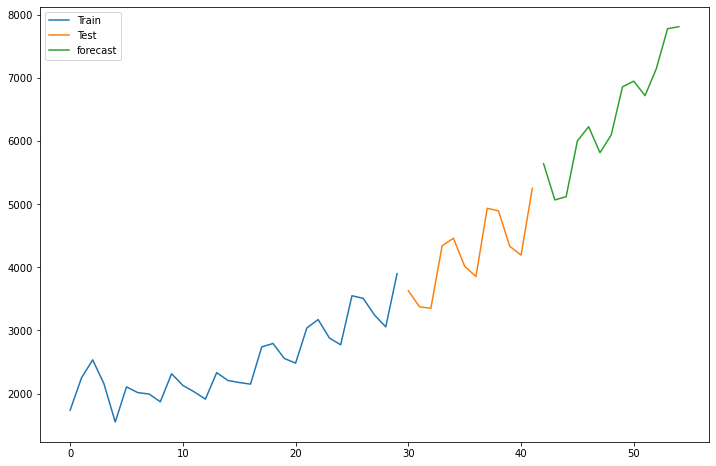

In [101]:
train_data.Sales.plot(legend=True,label='Train')
test_data.Sales.plot(legend=True,label='Test')
model_forcast.plot(legend=True,label='forecast',figsize=(12,8))
plt.show();